# Concerns:
- Todos:
    - Fix separators
    - CLTK
    - REDO ExtractDocumentContentFunction with lemmatization and stop word
- Paternalism (vs. more humanistic over time) actually go away from paternalism to more of a "God to Man" idea like up to down
    - Word Frequency:
        - Statistical testing?
        - In GRS, Muslim religious texts (how much of a Muslim clerics' text to classify as a Jihad or not)
        - First identifies with a baseline Jihad with similarity to Muslim clerics texts
    - Can compare each pope's documents to the documents of the First and Second Vatican Council
        - Are these pope's documents more similar to the First or Second Vatican council (using some ML)
        - Drift and backsliding
    - Focus/Validity:
        - Should not do (validity is not there because)
        - Documents of the first Vatican Council does not give insight into paternalism
        - Should instead focus on "the Catholic Church's conern with God or people"
- Time series:
    - "God" - "Human" Cosine similarity over document time
    - Frequency of words over time plot

In [ ]:
### Packages ###
import os
import numpy as np
from scipy.spatial.distance import cosine

from utils.Main import *
from utils.Plots import *
from utils.Council import *
from utils.Encylicals import *

# WebScrape

In [2]:
## Save Encylicals ###
# SaveEnclylicals()

In [3]:
## Save Vatican Council Documents
# SaveVaticanDocuments("en")

# Load Text

In [4]:
RootDirectory = "/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Data"
df_Encyclicals = LoadEncyclicals(os.path.join(RootDirectory, "Encylicals"))
df_Councils = LoadCouncils(os.path.join(RootDirectory, "Councils"))


In [5]:
df_Councils

,Council,Title,DocumentText
0,2,ad-gentes,DECREEAD GENTESON THE MISSION ACTIVITYOF THE C...
1,2,apostolicam-actuositatem,DECREE ON THE APOSTOLATE OF THE LAITYAPOSTOLIC...
2,2,christus-dominus,DECREE CONCERNINGTHE PASTORAL OFFICE OF BISHOP...
3,1,dei-filius,"The Orthodox Confession of the Eastern Church,..."
4,2,dei-verbum,1. Hearing the word of God with reverence and ...
5,2,dignitatis-humanae,AR-BE-CS-DE-EN-ES-FR-IT-HU-LA-LV-PT-SW-ZHDECLA...
6,2,gaudium-et-spes,PASTORAL CONSTITUTIONON THE CHURCH IN THEMODER...
7,2,gravissimum-educationis,DECLARATION ON CHRISTIAN EDUCATIONGRAVISSIMUM ...
8,2,inter-mirifica,DECREE ON THE MEDIA OF SOCIAL COMMUNICATIONSIN...
9,2,lumen-gentium,THE MYSTERY OF THE CHURCH\n\n2. The eternal Fa...


In [6]:
df_Encyclicals

,PopeName,encyclical,DocumentText,DocumentDate,PreVaticanII
0,leo_xiii,magni-nobis,"2. We, on our part, have not delayed to fulfil...",1889-03-07,True
1,leo_xiii,vi-e-ben-noto,2. It is easy to imagine what reasons We have ...,1887-09-20,True
2,leo_xiii,diuturnum,"2. For a long time, indeed, pains have been ta...",1881-06-29,True
3,leo_xiii,supremi-apostolatus-officio,2. It has always been the habit of Catholics i...,1883-09-01,True
4,leo_xiii,inimica-vis,2. Our predecessors in the Roman pontificate h...,1892-12-08,True
...,...,...,...,...,...
210,pius_xii,redemptoris-nostri-cruciatus,"1. The passion of Our Redeemer, rendered prese...",1949-04-15,True
211,pius_xii,sempiternus-rex-christus,"Given at St. Peter's Basilica, Rome, on the 8t...",1951-09-08,True
212,pius_xii,sacra-virginitas,1. Holy virginity and that perfect chastity wh...,1954-03-25,True
213,pius_xii,le-pelerinage-de-lourdes,"2. We are particularly pleased, therefore, to ...",1957-07-02,True


# Word Frequency

In [7]:
### Stop Words ###
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('stopwords')
nltk.download('punkt')
CustomStopWords = {"would", "which", "should", "shall", "thing"} 
StopWordsSet = set(stopwords.words("english")).union(STOPWORDS, CustomStopWords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## All Popes

In [8]:
### Get word frequency per pope ###
EncylicalWordFrequency_ByPope = GetWordFrequency(df_input = df_Encyclicals, 
                                                  GroupByVar = "PopeName", 
                                                  StopWordsSet = StopWordsSet, 
                                                  TopNInput = 1000,
                                                  Normalize = True)

In [9]:
ChiSquaredTestResults_ByPope = ChiSquaredTestWordFrequency(EncylicalWordFrequency_ByPope, "francesco", "leo_xiii")["significant_words"]

## Popes before and after

In [10]:
### Get word frequency for popes before Vatican II and after Vatican II ###
EncylicalWordFrequency_ByBeforeAfter = GetWordFrequency(df_input = df_Encyclicals, 
                                                     GroupByVar = "PreVaticanII", 
                                                     StopWordsSet = StopWordsSet, 
                                                     TopNInput = 1000,
                                                     Normalize = True)
EncylicalWordFrequency_ByBeforeAfter.columns = ["Pre_VaticanII_Popes", "Post_VaticanII_Popes"]
EncylicalWordFrequency_ByBeforeAfter["Post_Minus_Pre"] = EncylicalWordFrequency_ByBeforeAfter["Post_VaticanII_Popes"] - EncylicalWordFrequency_ByBeforeAfter["Pre_VaticanII_Popes"]

In [11]:
ChiSquaredTestResults_ByBeforeAfter = ChiSquaredTestWordFrequency(EncylicalWordFrequency_ByBeforeAfter, "Pre_VaticanII_Popes", "Post_VaticanII_Popes")["significant_words"]

## Councils

In [12]:
### Get word frequency per Council ###
EncylicalWordFrequency_ByCouncil = GetWordFrequency(df_input = df_Councils, 
                                                  GroupByVar = "Council", 
                                                  StopWordsSet = StopWordsSet, 
                                                  TopNInput = 1000,
                                                  Normalize = True)
EncylicalWordFrequency_ByCouncil.columns = ["Vatican2", "Vatican1"]
EncylicalWordFrequency_ByCouncil = EncylicalWordFrequency_ByCouncil[["Vatican1", "Vatican2"]]
EncylicalWordFrequency_ByCouncil["Post_Minus_Pre"] = EncylicalWordFrequency_ByCouncil["Vatican2"] - EncylicalWordFrequency_ByCouncil["Vatican1"]

In [13]:
ChiSquaredTestResults_ByCouncil = ChiSquaredTestWordFrequency(EncylicalWordFrequency_ByCouncil, "Vatican1", "Vatican2")["significant_words"]

# Text Comparison

## Between Popes

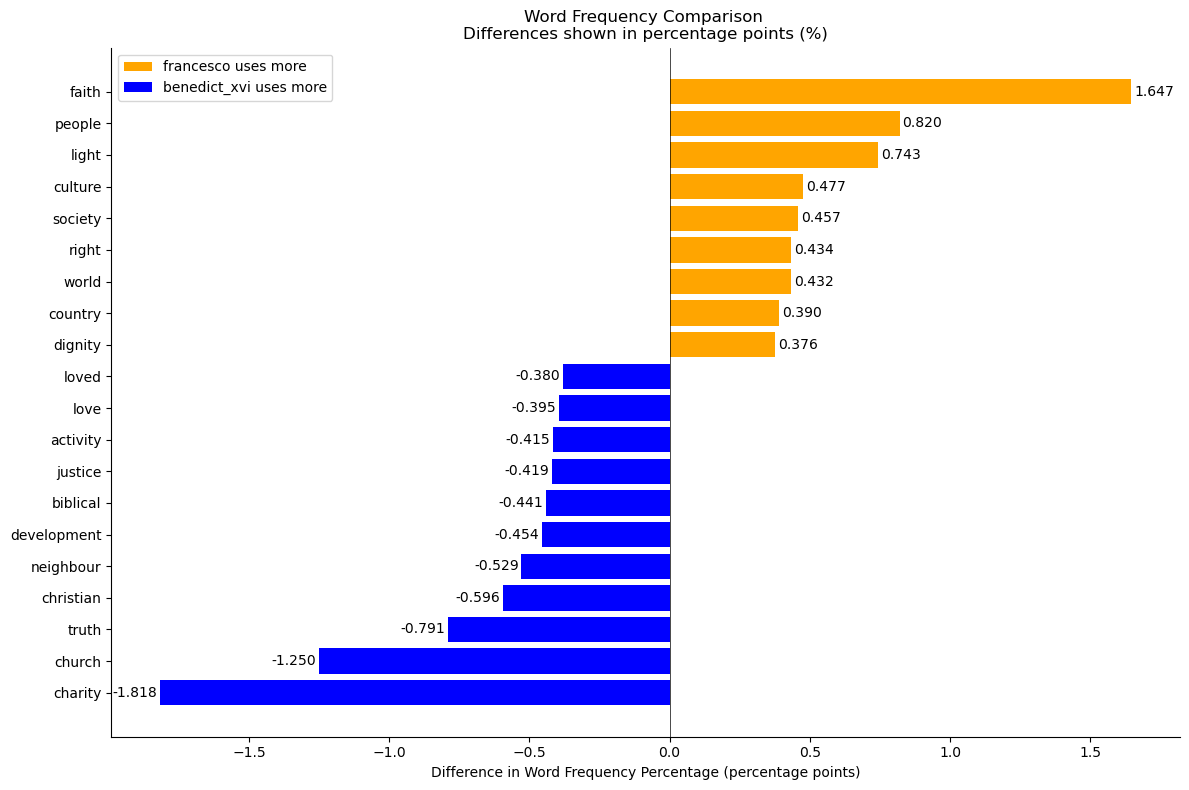

In [14]:
fig, ax = DivergingBarChartFunction(EncylicalWordFrequency_ByPope, "francesco", "benedict_xvi", NWords=20)


## Pre/Post Popes

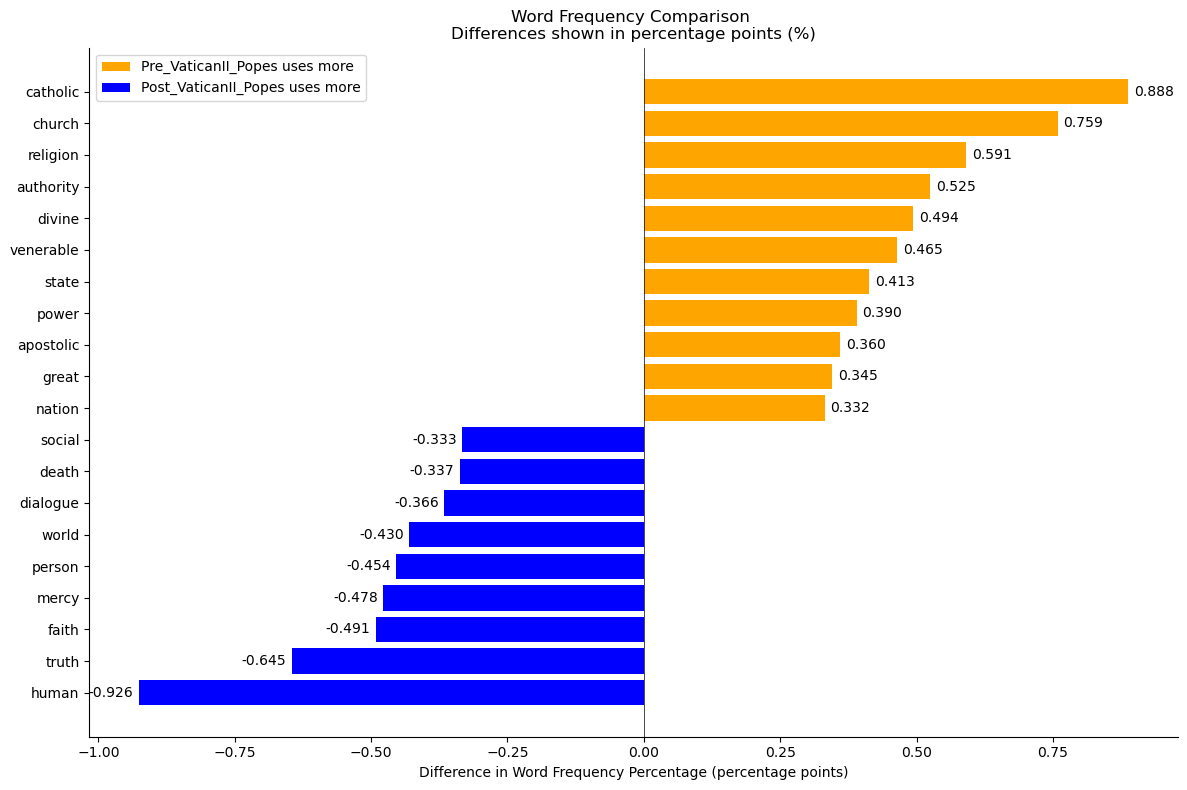

In [15]:
fig, ax = DivergingBarChartFunction(EncylicalWordFrequency_ByBeforeAfter, "Pre_VaticanII_Popes", "Post_VaticanII_Popes", NWords=20)

## By Council Documents

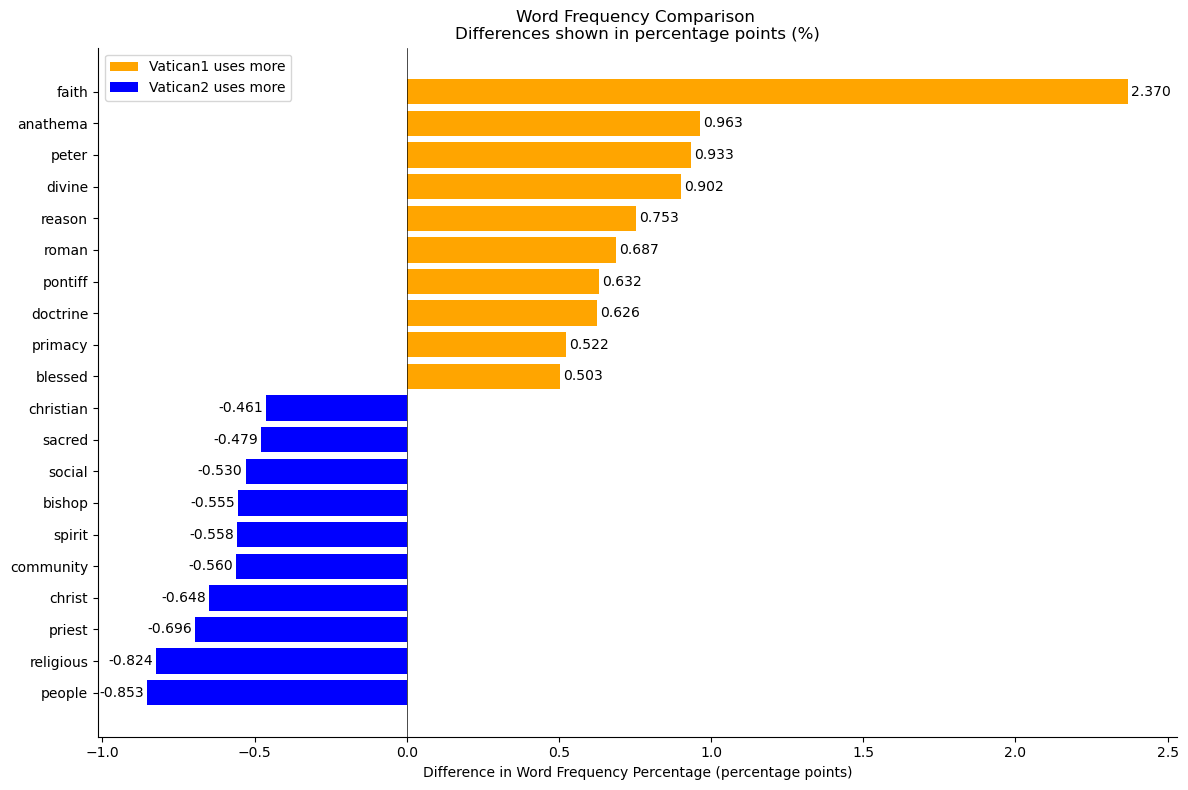

In [16]:
fig, ax = DivergingBarChartFunction(EncylicalWordFrequency_ByCouncil, "Vatican1", "Vatican2", NWords=20)


# Topic Modelling

## Pre/post Popes

In [17]:
# For Vatican II comparison
EncylicalPrePostPopes = AnalyzeVaticanIITopics(df_Encyclicals, NumTopics=5, stopwords=StopWordsSet)
EncylicalPrePostPopes_Comparison = CompareTopicResults(EncylicalPrePostPopes)
# EncylicalPrePostPopes_Comparison


In [18]:
### Topics ###
TopicColumns = [col for col in EncylicalPrePostPopes_Comparison.columns if 'Topics' in col]
EncylicalPrePostPopes_Comparison[TopicColumns]


,Pre-Vatican II_Topics,Post-Vatican II_Topics
0,"church, christ, faith, peter, apostle, divine,...","truth, human, mercy, christ, reason, father, f..."
1,"church, catholic, religion, christian, faith, ...","faith, light, christ, jesus, church, truth, sa..."
2,"christ, church, christian, prayer, faith, divi...","human, people, church, world, social, society,..."
3,"church, catholic, mexico, priest, bishop, stat...","human, death, jesus, person, commandment, abor..."
4,"church, faith, scripture, catholic, great, sac...","church, christian, unity, christ, dialogue, co..."


In [19]:
### Coherence Scores ###
CoherenceColumns = [col for col in EncylicalPrePostPopes_Comparison.columns if 'Coherence' in col]
EncylicalPrePostPopes_Comparison[CoherenceColumns]

,Pre-Vatican II_Coherence,Post-Vatican II_Coherence
0,0.272612,0.35625
1,0.272612,0.35625
2,0.272612,0.35625
3,0.272612,0.35625
4,0.272612,0.35625


## Between Popes

In [20]:
### For Vatican II comparison ###
PopeTopicModellingResults = AnalyzePapalTopics(df_Encyclicals, NumTopics=5, stopwords=StopWordsSet)
PopeTopicModellingResults_Comparison = CompareTopicResults(PopeTopicModellingResults)
# PopeTopicModellingResults_Comparison

In [21]:
### Topics ###
TopicColumns = [col for col in PopeTopicModellingResults_Comparison.columns if 'Topics' in col]
PopeTopicModellingResults_Comparison[TopicColumns]

,leo_xiii_Topics,john_paul_ii_Topics,benedict_xv_Topics,pius_x_Topics,john_xxiii_Topics,francesco_Topics,pius_xi_Topics,benedict_xvi_Topics,paul_vi_Topics,pius_xii_Topics
0,"church, christ, peter, faith, apostle, authori...","human, death, jesus, people, person, church, w...","jerome, bible, scripture, truth, writer, book,...","church, christ, faith, catholic, divine, broth...","right, order, conscience, force, society, univ...","romano, letter, osservatore, saint, heart, jes...","simply, obstacle, attentively, undeterred, fai...","church, charity, truth, christian, social, hum...","church, priest, christ, priesthood, celibacy, ...","published, virgin, osservatore, phrase, cardin..."
1,"church, catholic, christian, faith, religion, ...","truth, reason, human, faith, philosophy, knowl...","christ, charity, preaching, church, brother, j...","church, faith, religion, catholic, christ, peo...","truth, church, right, nature, christ, world, g...","faith, light, christ, truth, jesus, saint, chu...","christ, church, faith, christian, right, world...","truth, charity, social, development, church, h...","peace, church, world, nation, people, brother,...","church, catholic, missionary, christ, faith, c..."
2,"scripture, catholic, church, sacred, faith, gr...","church, christian, unity, christ, council, dia...","child, little, christ, brother, jesus, word, o...","clergy, brother, order, venerable, sacred, pri...","congregation, faith, priestly, year, propagati...","faith, people, human, world, person, society, ...","christian, priest, faithful, great, christ, pr...","truth, charity, church, christian, jesus, huma...","church, opinion, mystery, christ, liturgy, fai...","christ, church, truth, human, divine, faith, c..."
3,"university, study, french, desire, letter, aca...","mercy, christ, father, people, justice, church...","church, christ, people, boniface, christian, c...","church, world, divine, christ, gregory, cathol...","church, christ, teaching, year, rosary, eterna...","sister, earth, mother, water, beautiful, lord,...","peace, church, christ, nation, state, great, a...","church, christian, faith, neighbour, jesus, ch...","married, church, moral, marriage, human, husba...","christian, peace, prayer, people, brother, div..."
4,"church, christ, human, right, great, faith, pr...","human, anniversary, novarum, rerum, ninetieth,...","church, faith, christ, father, christian, grea...","instruction, teaching, christian, faith, knowl...","truth, church, christ, nature, unity, error, g...","people, human, world, society, social, person,...","church, catholic, action, brother, order, vene...","charity, faith, christian, human, neighbour, c...","church, christ, priest, celibacy, priesthood, ...","missionary, church, catholic, faith, people, c..."


In [22]:
### Coherence Scores ###
CoherenceColumns = [col for col in PopeTopicModellingResults_Comparison.columns if 'Coherence' in col]
PopeTopicModellingResults_Comparison[CoherenceColumns]

,leo_xiii_Coherence,john_paul_ii_Coherence,benedict_xv_Coherence,pius_x_Coherence,john_xxiii_Coherence,francesco_Coherence,pius_xi_Coherence,benedict_xvi_Coherence,paul_vi_Coherence,pius_xii_Coherence
0,0.296168,0.390802,0.307013,0.26411,0.369942,0.443855,0.336777,0.243289,0.398188,0.31043
1,0.296168,0.390802,0.307013,0.26411,0.369942,0.443855,0.336777,0.243289,0.398188,0.31043
2,0.296168,0.390802,0.307013,0.26411,0.369942,0.443855,0.336777,0.243289,0.398188,0.31043
3,0.296168,0.390802,0.307013,0.26411,0.369942,0.443855,0.336777,0.243289,0.398188,0.31043
4,0.296168,0.390802,0.307013,0.26411,0.369942,0.443855,0.336777,0.243289,0.398188,0.31043


# Sentiment Analysis

In [23]:
EncyclicalSentimentsDF = GetEncylicalSentiments(df_Encyclicals)

In [24]:
EncyclicalSentimentsDF

,DocumentTitle,DocumentDate,PopeName,PreVaticanII,NegativeScore,NeutralScore,PositiveScore,CompoundScore
70,inscrutabili-dei-consilio,1878-04-21,leo_xiii,True,0.103,0.706,0.191,0.9997
34,quod-apostolici-muneris,1878-12-28,leo_xiii,True,0.155,0.673,0.173,0.7850
22,aeterni-patris,1879-08-04,leo_xiii,True,0.061,0.697,0.242,1.0000
49,arcanum,1880-02-10,leo_xiii,True,0.080,0.749,0.172,1.0000
16,grande-munus,1880-09-30,leo_xiii,True,0.000,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
166,caritas-in-veritate,2009-06-29,benedict_xvi,False,0.031,0.696,0.272,1.0000
139,lumen-fidei,2013-06-29,francesco,False,0.034,0.713,0.253,1.0000
137,laudato-si,2015-05-24,francesco,False,0.141,0.780,0.079,-0.9446
138,fratelli-tutti,2020-10-03,francesco,False,0.118,0.690,0.193,1.0000


/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Code/utils/Plots/PlotSentimentAnalysis.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])


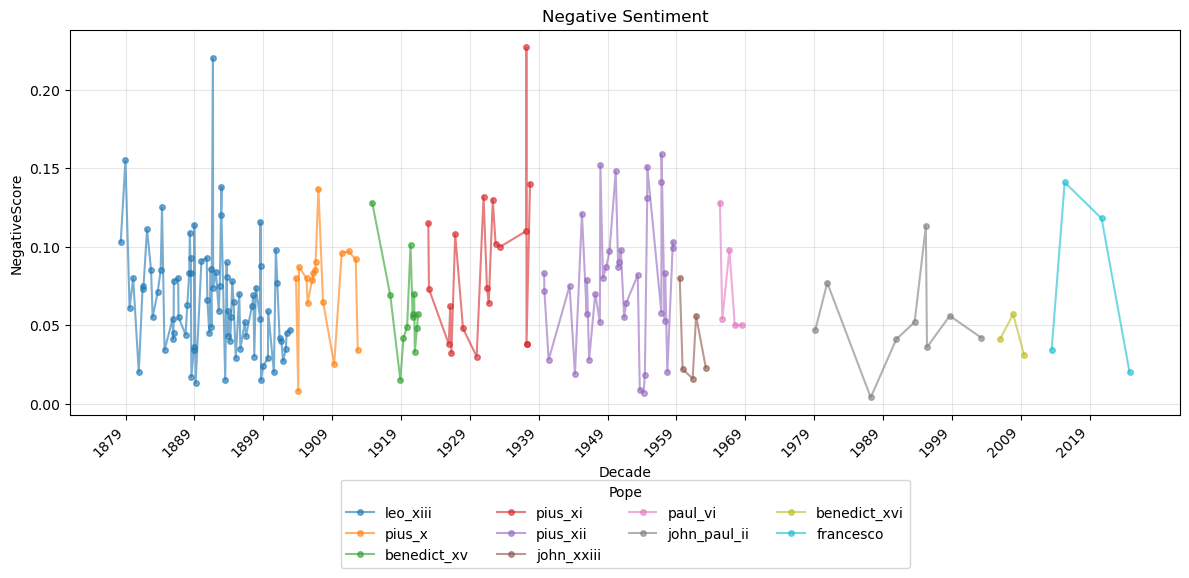

In [25]:
PlotSentimentScores(EncyclicalSentimentsDF[EncyclicalSentimentsDF["NegativeScore"] !=0], "NegativeScore")

/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Code/utils/Plots/PlotSentimentAnalysis.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])


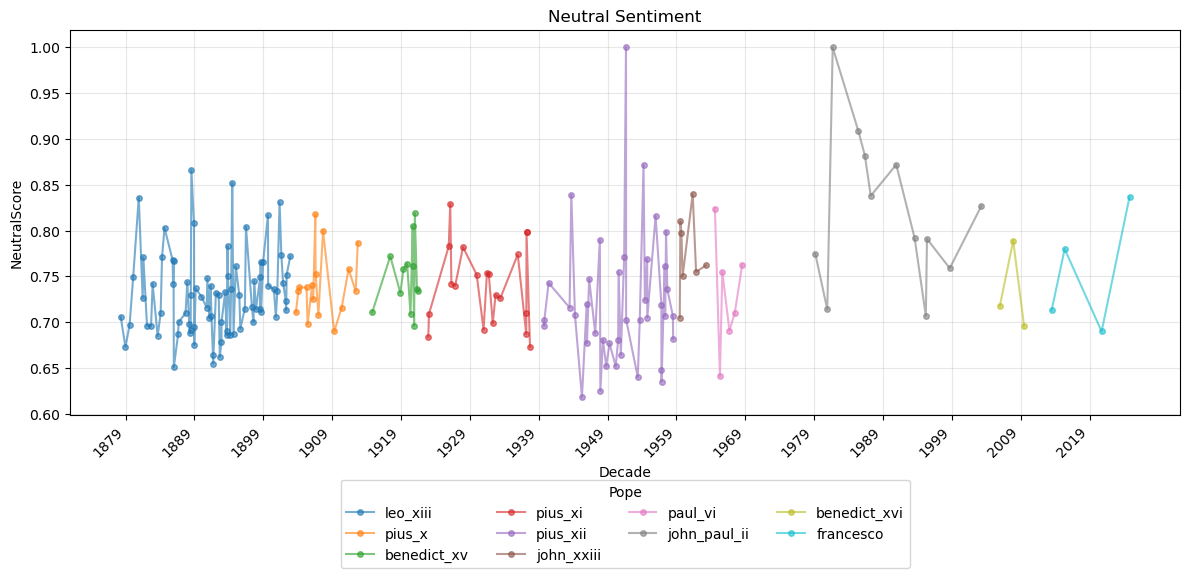

In [26]:
PlotSentimentScores(EncyclicalSentimentsDF[EncyclicalSentimentsDF["NeutralScore"] !=0], "NeutralScore")

/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Code/utils/Plots/PlotSentimentAnalysis.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])


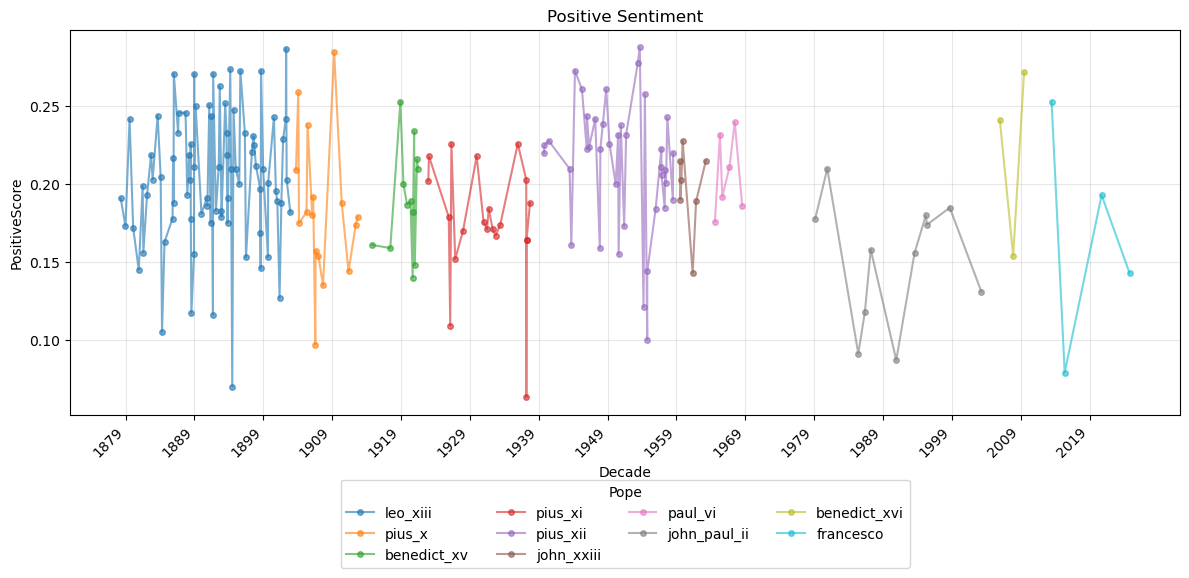

In [27]:
PlotSentimentScores(EncyclicalSentimentsDF[EncyclicalSentimentsDF["PositiveScore"] !=0], "PositiveScore")

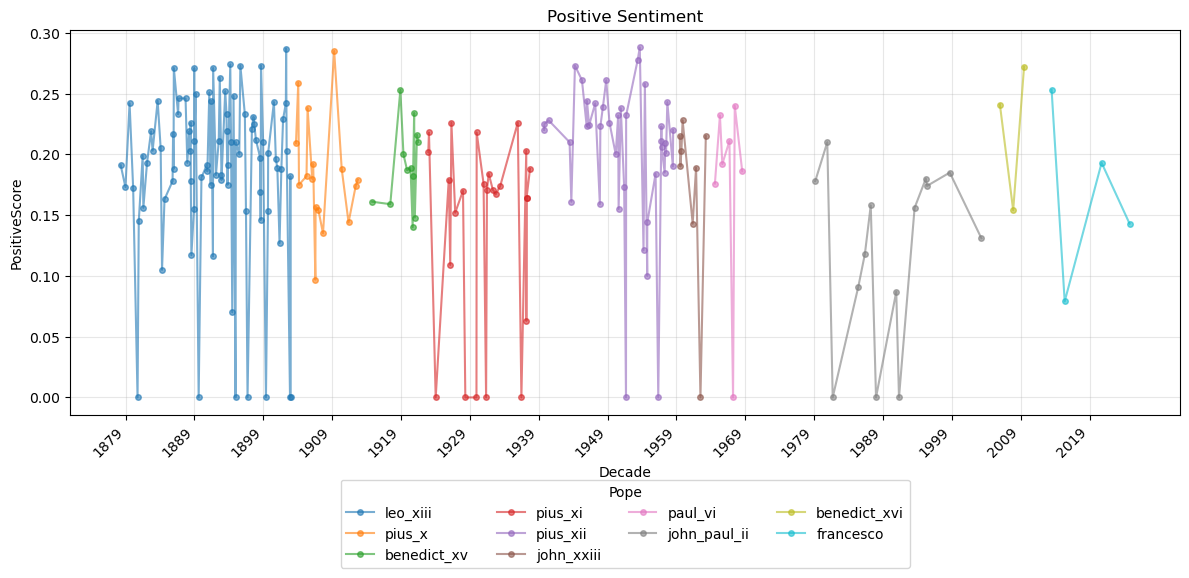

In [28]:
PlotSentimentScores(EncyclicalSentimentsDF, "PositiveScore")

# Comparison to Vatican Council Documents

In [29]:
### For now ###
# df_Councils["Council"] = list(np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])+1)

### Run the analysis ###
DocumentSimilarity, PopeSimilarity = AnalyzeDocumentSimilarities(df_Councils, df_Encyclicals)


In [30]:
DocumentSimilarity[DocumentSimilarity["Vatican1_Similarity"] > DocumentSimilarity["Vatican2_Similarity"]]

,PopeName,encyclical,Vatican1_Similarity,Vatican2_Similarity,DocumentDate
22,leo_xiii,aeterni-patris,0.285955,0.261613,1879-08-04
29,leo_xiii,officio-sanctissimo,0.158260,0.138034,1887-12-22
69,leo_xiii,satis-cognitum,0.492961,0.406489,1896-06-29
77,leo_xiii,paterna-caritas,0.145115,0.134446,1888-07-25
116,pius_x,pascendi-dominici-gregis,0.243681,0.213118,1907-09-08


In [31]:
PopeSimilarity

,PopeName,Vatican1_Similarity,Vatican2_Similarity,Vatican1_StdDev,Vatican2_StdDev
0,benedict_xv,0.150974,0.193646,0.071133,0.076654
1,benedict_xvi,0.144086,0.271240,0.044557,0.108553
2,francesco,0.126608,0.262344,0.118878,0.140578
3,john_paul_ii,0.123065,0.211969,0.088112,0.152396
4,john_xxiii,0.076713,0.109604,0.059645,0.076109
5,leo_xiii,0.140826,0.184077,0.087368,0.095479
6,paul_vi,0.104865,0.176452,0.066509,0.128433
7,pius_x,0.161035,0.207587,0.079985,0.093357
8,pius_xi,0.113433,0.159896,0.099723,0.125852
9,pius_xii,0.105311,0.153334,0.069779,0.092320


In [32]:
PopeSimilarity["Post_Minus_Pre"] = PopeSimilarity["Vatican2_Similarity"] - PopeSimilarity["Vatican1_Similarity"]

In [33]:
PopeSimilarity

,PopeName,Vatican1_Similarity,Vatican2_Similarity,Vatican1_StdDev,Vatican2_StdDev,Post_Minus_Pre
0,benedict_xv,0.150974,0.193646,0.071133,0.076654,0.042672
1,benedict_xvi,0.144086,0.271240,0.044557,0.108553,0.127154
2,francesco,0.126608,0.262344,0.118878,0.140578,0.135736
3,john_paul_ii,0.123065,0.211969,0.088112,0.152396,0.088905
4,john_xxiii,0.076713,0.109604,0.059645,0.076109,0.032891
5,leo_xiii,0.140826,0.184077,0.087368,0.095479,0.043250
6,paul_vi,0.104865,0.176452,0.066509,0.128433,0.071587
7,pius_x,0.161035,0.207587,0.079985,0.093357,0.046552
8,pius_xi,0.113433,0.159896,0.099723,0.125852,0.046463
9,pius_xii,0.105311,0.153334,0.069779,0.092320,0.048023


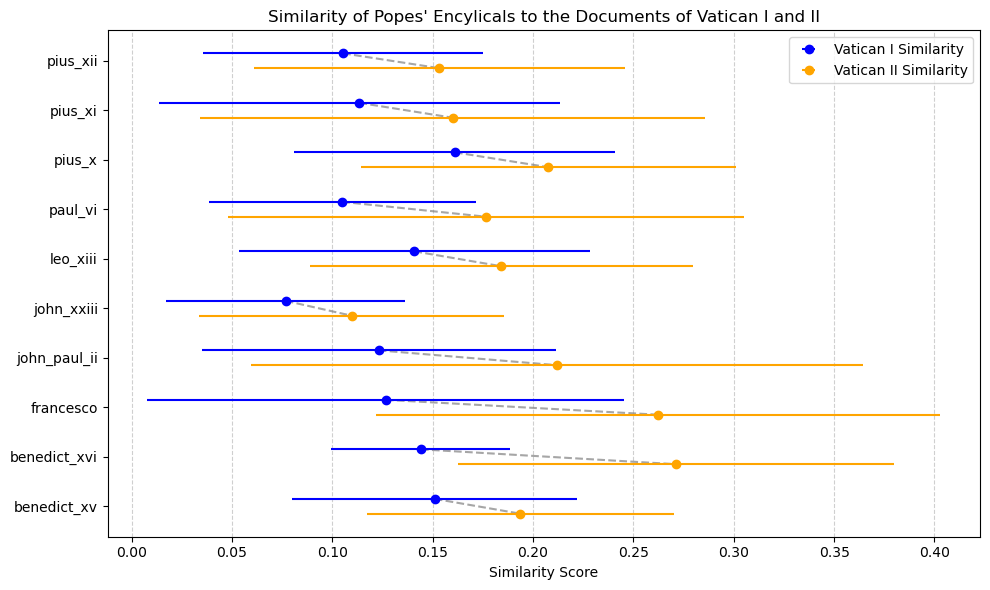

In [34]:
PlotCouncilEncyclicalSimilarityScore(PopeSimilarity)

In [36]:
print(df_Encyclicals)

     PopeName                    encyclical  \
0    leo_xiii                   magni-nobis   
1    leo_xiii                 vi-e-ben-noto   
2    leo_xiii                     diuturnum   
3    leo_xiii   supremi-apostolatus-officio   
4    leo_xiii                   inimica-vis   
..        ...                           ...   
210  pius_xii  redemptoris-nostri-cruciatus   
211  pius_xii      sempiternus-rex-christus   
212  pius_xii              sacra-virginitas   
213  pius_xii      le-pelerinage-de-lourdes   
214  pius_xii              invicti-athletae   

                                          DocumentText DocumentDate  \
0    2. We, on our part, have not delayed to fulfil...   1889-03-07   
1    2. It is easy to imagine what reasons We have ...   1887-09-20   
2    2. For a long time, indeed, pains have been ta...   1881-06-29   
3    2. It has always been the habit of Catholics i...   1883-09-01   
4    2. Our predecessors in the Roman pontificate h...   1892-12-08   
..       

# Cosine Analysis

import spacy
import pandas as pd
from scipy.spatial.distance import cosine

# Load a medium or large model with word vectors
nlp = spacy.load("en_core_web_md")

# Define word lists for "God" and "Man"
god_words = ["God", "divine", "Christ", "Lord", "holy", "sacred"]
man_words = ["man", "human", "people", "mankind", "humanity", "person"]

# Function to compute average word vector for a set of words
def avg_vector(words, model):
    vectors = [model(word).vector for word in words if model(word).has_vector]
    return sum(vectors) / len(vectors) if vectors else None

# Compute reference vectors
god_vector = avg_vector(god_words, nlp)
man_vector = avg_vector(man_words, nlp)

# Function to compute cosine similarity between God and Man in a document
def cosine_similarity(text):
    doc_vector = avg_vector(text.split(), nlp)
    if doc_vector is None or god_vector is None or man_vector is None:
        return None
    return 1 - cosine(god_vector, doc_vector), 1 - cosine(man_vector, doc_vector)

# Compute similarity scores for each document
df["God_Similarity"], df["Man_Similarity"] = zip(*df["DocumentText"].apply(cosine_similarity))

# Display result
df[["DocumentDate", "God_Similarity", "Man_Similarity"]]
